<a href="https://colab.research.google.com/github/abegpatel/google-stock-price-prediction-using-RNN/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

recurrent neural network
1.idea to rnn
2.vanishing of gradient problem
3.lstm(long short term memory)
4.practical intuition
vanishing gradient problem(gradient descent problem)(globe of min of cost function(epsalon):
weight upadted
all neuron contibuted /update weight to all direction
multiply weight every time to all(lower value )
(low gradient-hard to update) vice-versa
wrec-samll-vanishing gradient problem
wrec-large-exploding gradient problem
exploding gradient problem:-
soultions-truncated back propagation
          penalties
          gradient clipping
vanishing gradient problem:-
          -weight initializations
          echo state networks
          long short term memory networks(LSTMs)
LSTM:
wrec=1(v-wrec-<1 e-wrec->1)
practical intuition:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip -uq "/content/drive/My Drive/P16-Recurrent-Neural-Networks.zip" -d "/content/drive/My Drive/"

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 10s 8ms/step - loss: 0.0527
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 10/100
1198/119

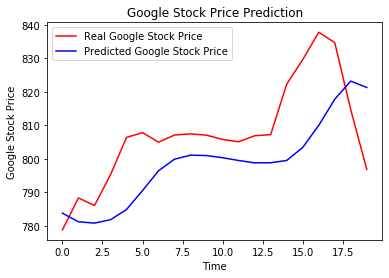

In [ ]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('/content/drive/My Drive/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/My Drive/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


Epoch 1/100
1238/1238 [==============================] - 1s 1ms/step - loss: 0.3548
Epoch 2/100
1238/1238 [==============================] - 0s 396us/step - loss: 0.1927
Epoch 3/100
1238/1238 [==============================] - 1s 408us/step - loss: 0.0957
Epoch 4/100
1238/1238 [==============================] - 1s 414us/step - loss: 0.0423
Epoch 5/100
1238/1238 [==============================] - 1s 448us/step - loss: 0.0208
Epoch 6/100
1238/1238 [==============================] - 1s 431us/step - loss: 0.0093
Epoch 7/100
1238/1238 [==============================] - 1s 425us/step - loss: 0.0030
Epoch 8/100
1238/1238 [==============================] - 1s 436us/step - loss: 9.6080e-04
Epoch 9/100
1238/1238 [==============================] - 1s 426us/step - loss: 7.2779e-04
Epoch 10/100
1238/1238 [==============================] - 1s 432us/step - loss: 6.8730e-04
Epoch 11/100
1238/1238 [==============================] - 1s 444us/step - loss: 6.6051e-04
Epoch 12/100
1238/1238 [==============

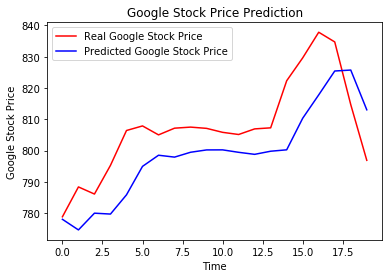

In [ ]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('/content/drive/My Drive/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 20 timesteps and t+1 output
X_train = []
y_train = []
for i in range(20, 1258):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 3, input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price for February 1st 2012 - January 31st 2017
dataset_test = pd.read_csv('/content/drive/My Drive/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:,1:2].values
real_stock_price = np.concatenate((training_set[0:1258], test_set), axis = 0)

# Getting the predicted stock price of 2017
scaled_real_stock_price = sc.fit_transform(real_stock_price)
inputs = []
for i in range(1258, 1278):
    inputs.append(scaled_real_stock_price[i-20:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price[1258:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

evaluating Rnn


In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))
print(rmse)

14.798240876619788


improving the RNN
-getting more training data
 about past 10 and 5 years of data
 2.increasing the no of timestpes:120timestep(6months)
 3.adding some other indicator
 4.adding more LSTMlayer
 5.adding more neurons in the LSTM layer
 (above exp we choose 50 neurons for each layer
 even more neurons can impriove the Rnn


tuning the RNN-
same as ann replace scoring='accuracy'
scoring='neg_mean_squared_error'






In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_regressor(optimizer):
    regressor = Sequential()
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return regressor


In [ ]:
egressor = KerasClassifier(build_fn = build_regressor)
parameters = {'batch_size': [25, 32],
              'epochs': [10, 50],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/10
1078/1078 [==============================] - 14s 13ms/step - loss: 356316.2174
Epoch 2/10
1078/1078 [==============================] - 8s 8ms/step - loss: 349091.1733
Epoch 3/10
1078/1078 [==============================] - 8s 8ms/step - loss: 346450.6360
Epoch 4/10
1078/1078 [==============================] - 8s 8ms/step - loss: 343962.4601
Epoch 5/10
1078/1078 [==============================] - 8s 8ms/step - loss: 341667.7449
Epoch 6/10
1078/1078 [==============================] - 8s 7ms/step - loss: 339347.4926
Epoch 7/10
1078/1078 [==============================] - 8s 8ms/step - loss: 337135.1947
Epoch 8/10
1078/1078 [==============================] - 8s 8ms/step - loss: 335029.2614
Epoch 9/10
1078/1078 [==============================] - 9s 9ms/step - loss: 332726.8986
Epoch 10/10
1078/1078 [==============================] - 8s 8ms/step - loss: 330573.6722
Epoch 1/10
1078/1078 [==============================] - 15s 14ms/step - loss: 359823.7365
Epoch 2/10
1078/1078 [=====